In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 16})

learning_rates = ['0.003', '0.0003', '3e-05', '3e-06', '3e-07'] # add more as needed
loss_components = ['PDE_Weight','BC_Weight','Data_Weight']

# Define a function to load data and return the loss list
def load_loss(path, column_name):
    return pd.read_csv(path)[column_name].to_numpy()

# Define a function to load data and return the mse loss list
def load_mse_loss(path):
    return pd.read_csv(path)['Average_MSE_Loss'].to_numpy()


# Check how learning rate affect AWPINN and AWIPINN performance

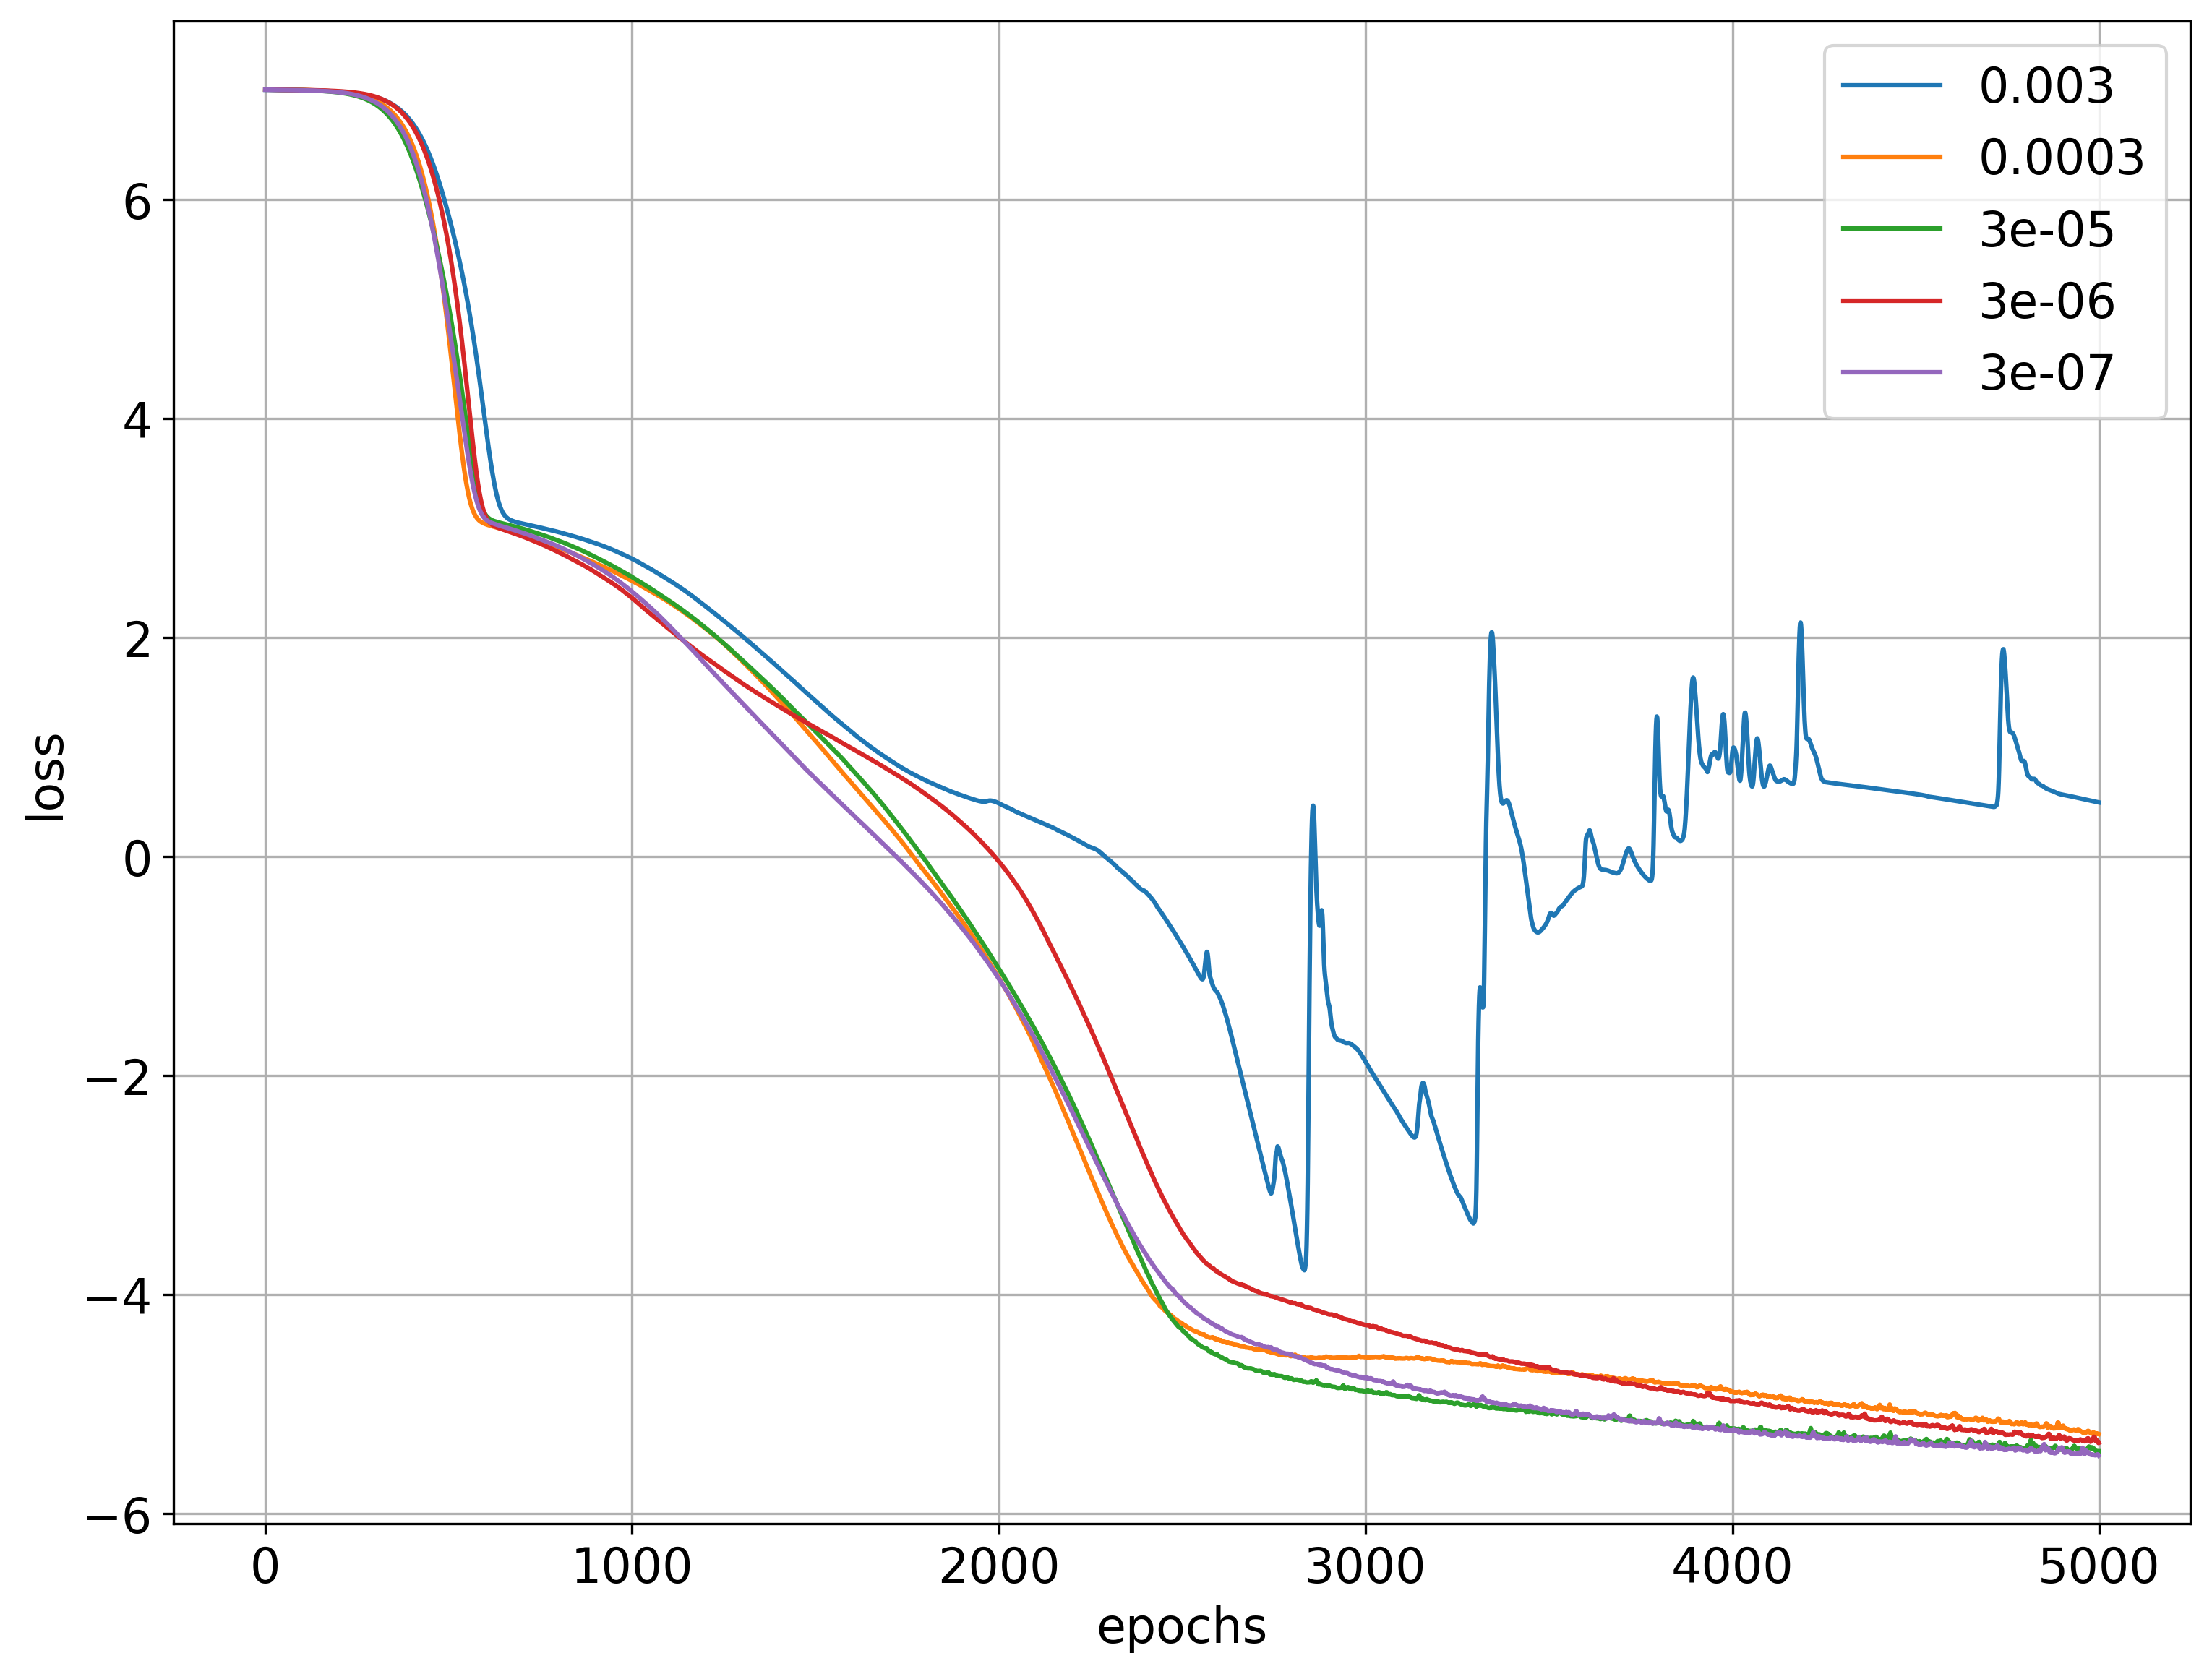

In [2]:
# Store configurations
awpinn_path = 'test_learning_rate/awpinn'

# Load the data using a loop
loss_lists = [load_mse_loss(awpinn_path + '/' + lr + '/average_loss.csv') for lr in learning_rates]

fig = plt.figure(figsize=(12, 9))
# Plot the data
for loss_list, label in zip(loss_lists, learning_rates):
    plt.plot(range(5000), np.log(loss_list[:5000]), label=label)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.savefig(f'test_learning_rate/plot/awpinn_loss.png', bbox_inches='tight')

# awipinn


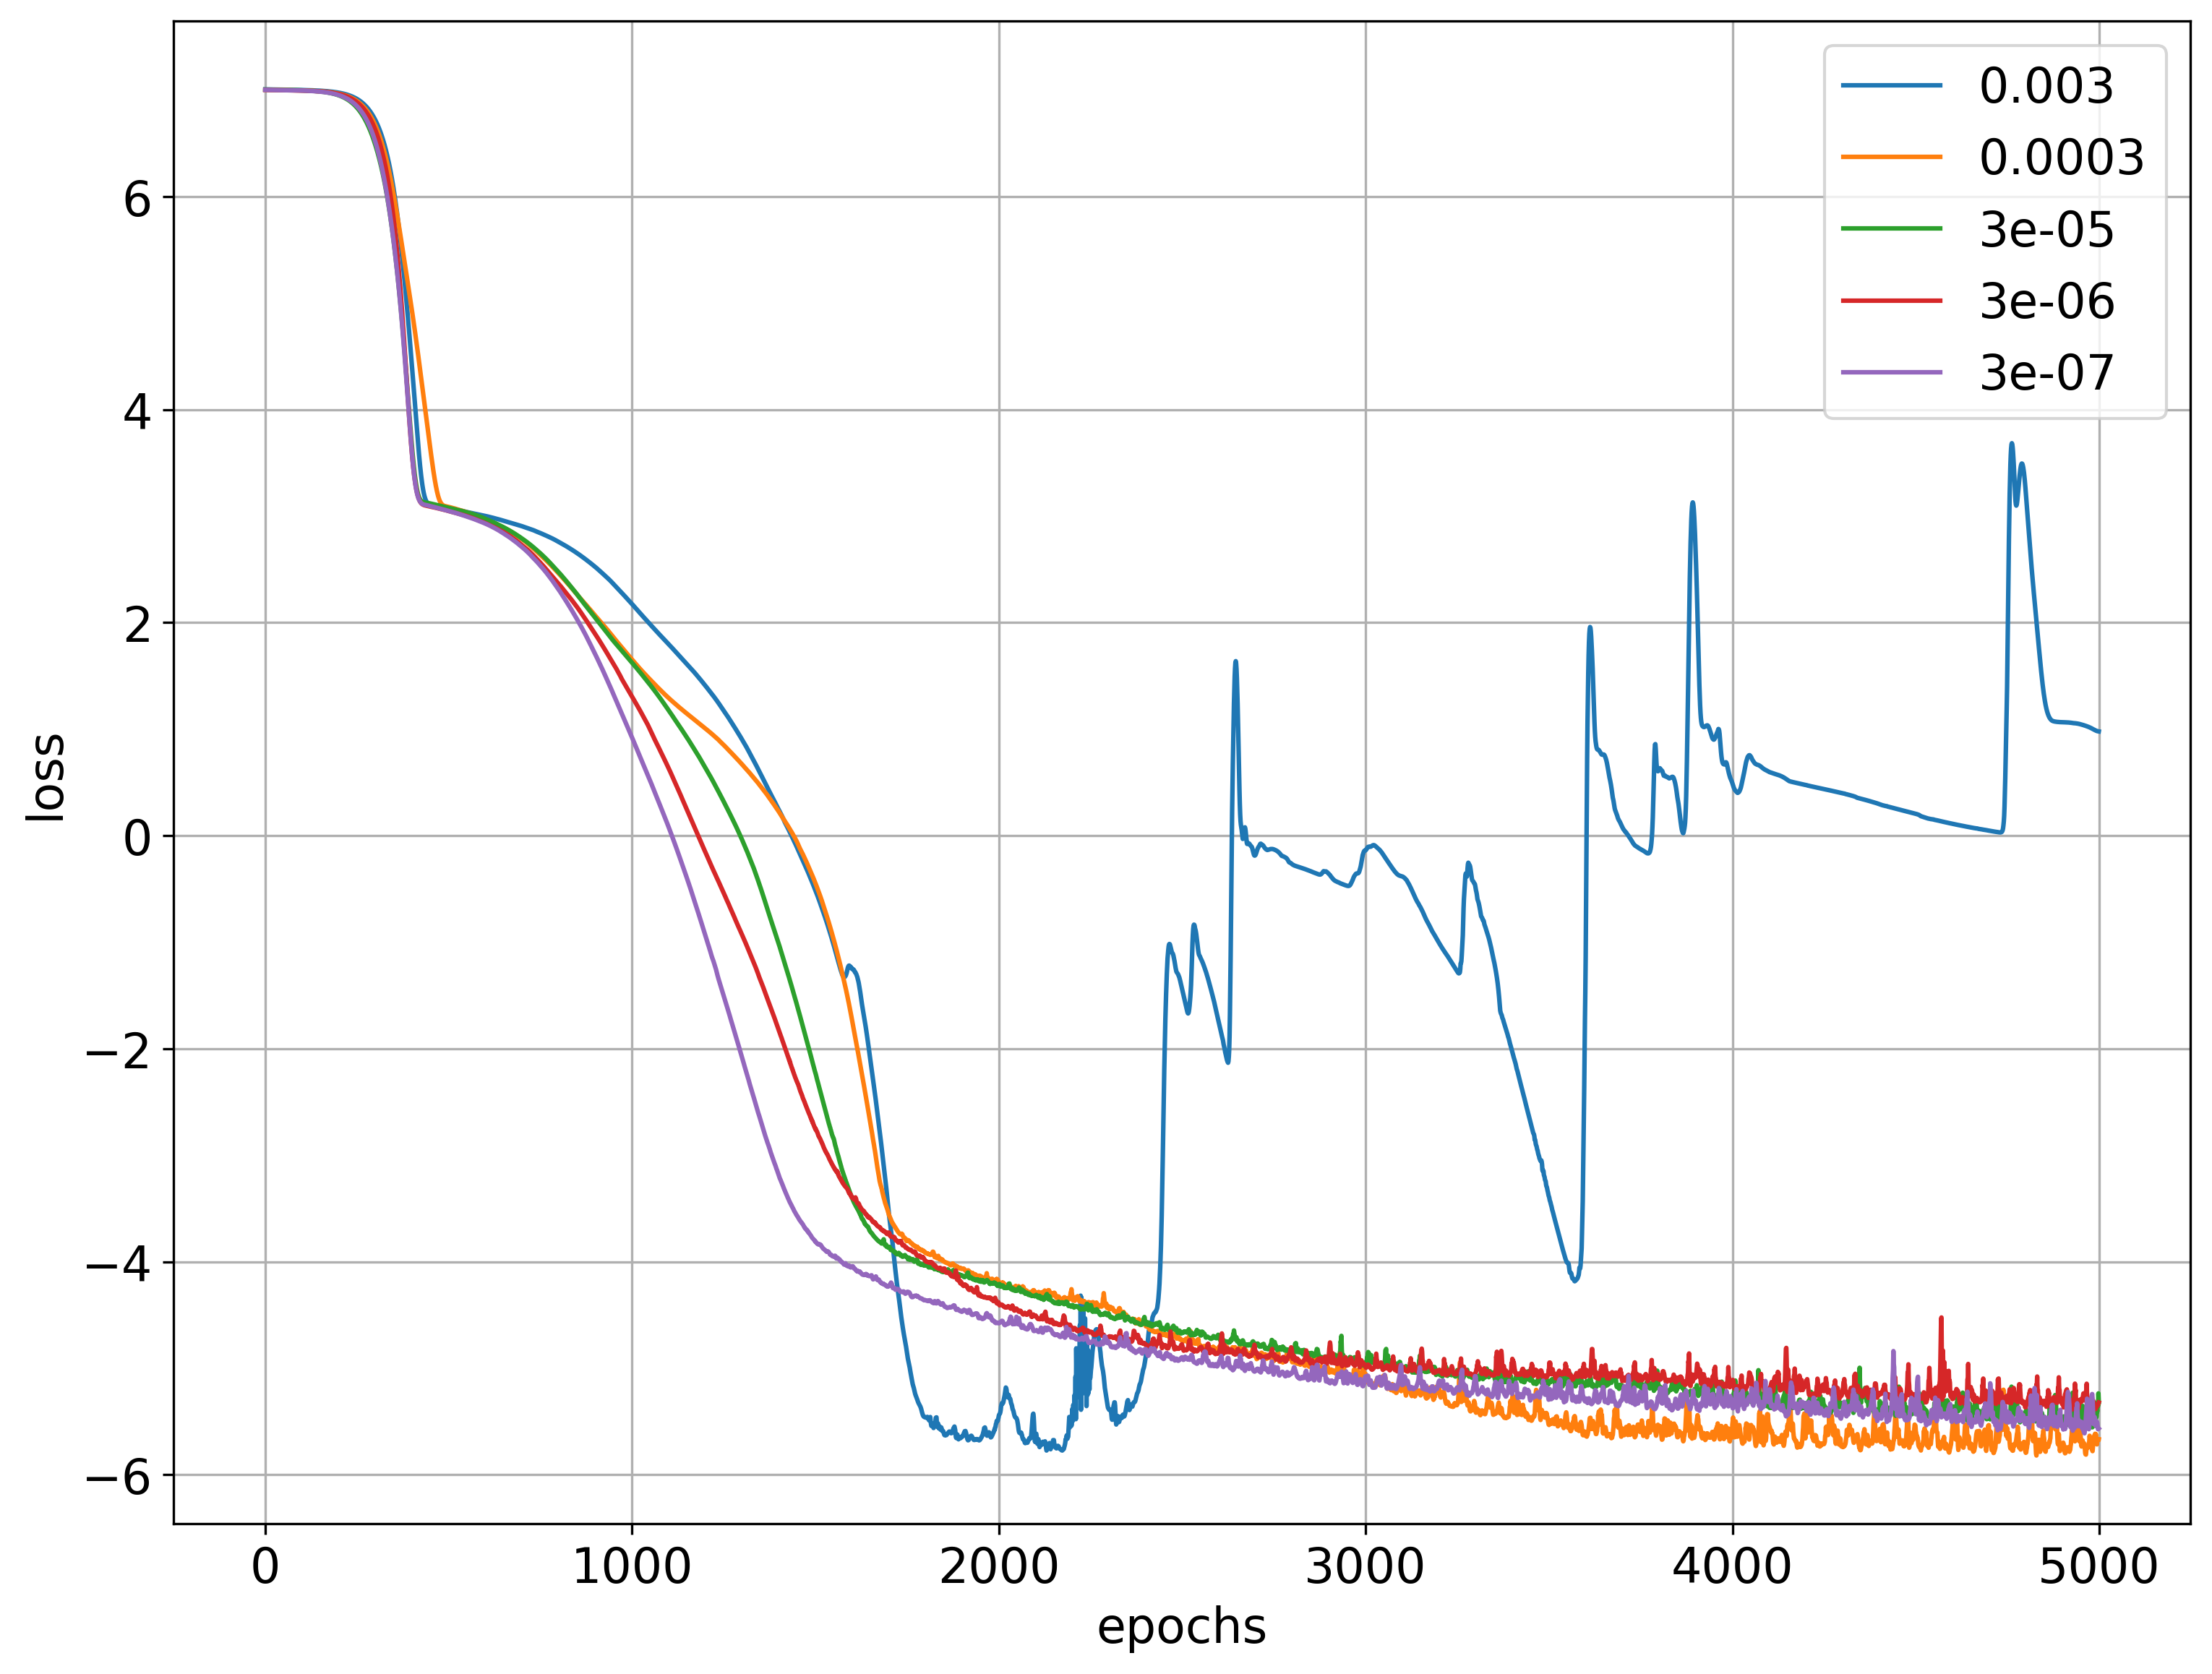

In [5]:
# Store configurations
awipinn_path = 'test_learning_rate/awipinn'

# Load the data using a loop
loss_lists = [load_mse_loss(awipinn_path + '/' + lr + '/average_loss.csv') for lr in learning_rates]

fig = plt.figure(figsize=(12, 9))
# Plot the data
for loss_list, label in zip(loss_lists, learning_rates):
    plt.plot(range(5000), np.log(loss_list[:5000]), label=label)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.savefig(f'test_learning_rate/plot/awipinn_loss.png', bbox_inches='tight')

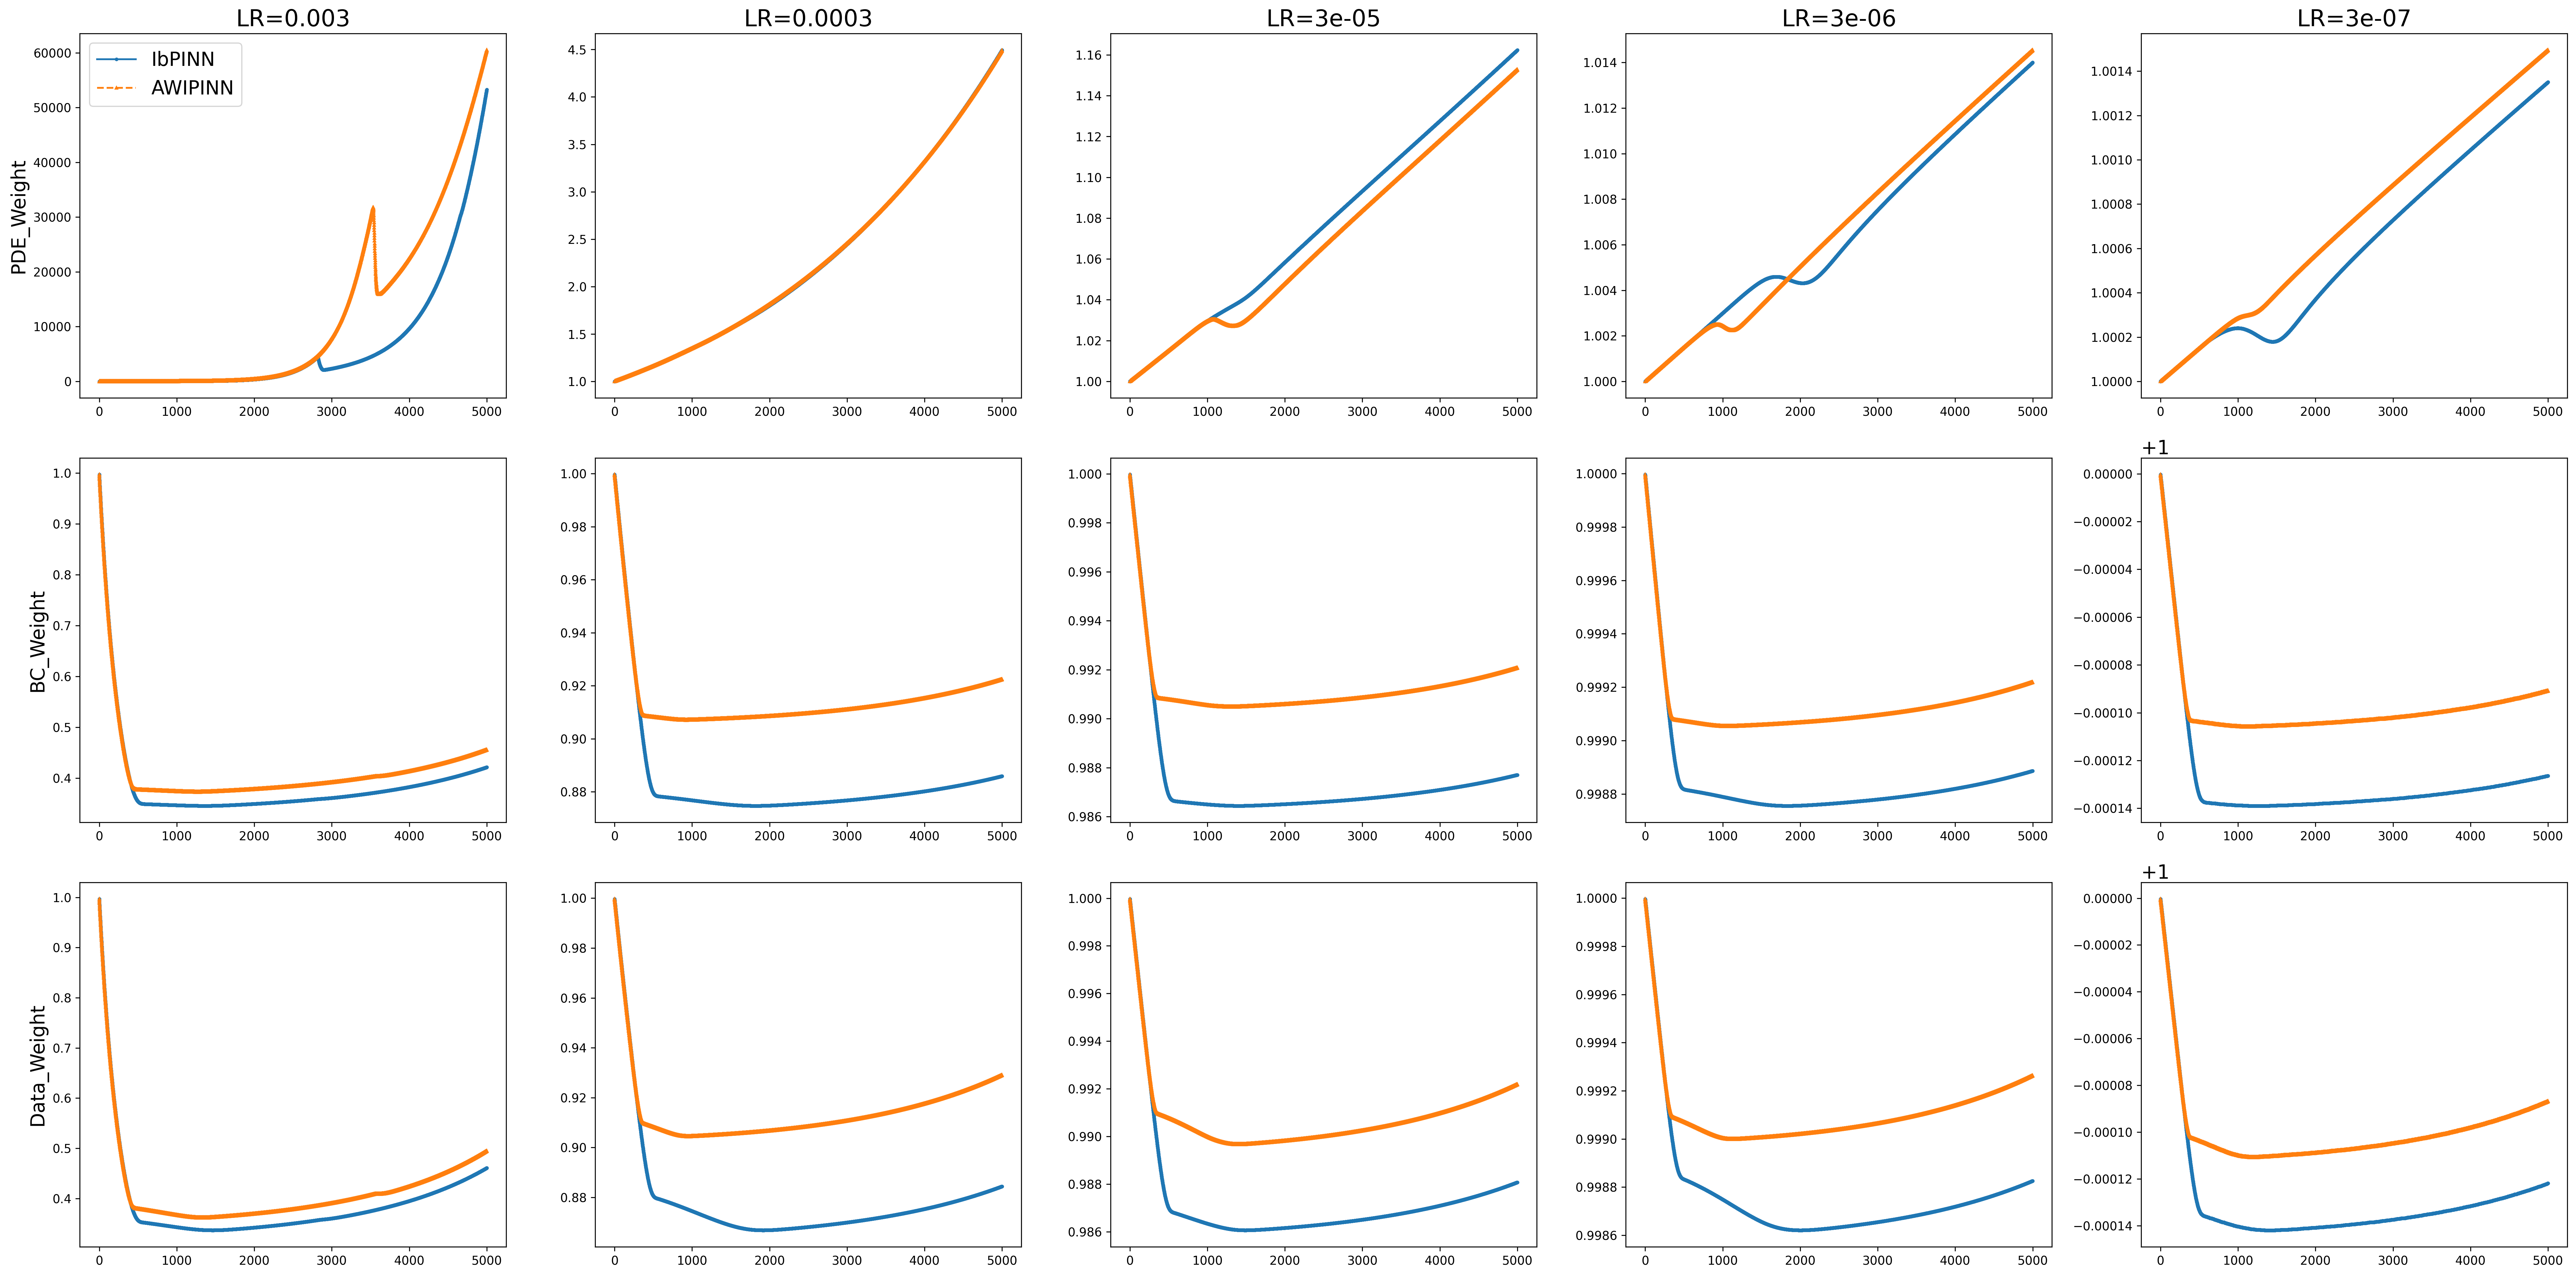

In [19]:
fig, axes = plt.subplots(3, 5, figsize=(30, 15))

# Create subplots for both awpinn_path and awipinn_path together
for i, loss_component in enumerate(loss_components):
    for j, lr in enumerate(learning_rates):
        ax = axes[i][j]
        
        # Load loss data for awpinn_path
        weights_list_pinn = load_loss(f"{awpinn_path}/weights/{lr}.csv", loss_component)
        ax.plot(weights_list_pinn, label=f"pinn LR={lr}", linestyle='-', marker='o', markersize=2)
        
        # Load loss data for awipinn_path
        weights_list_ipinn = load_loss(f"{awipinn_path}/weights/{lr}.csv", loss_component)
        ax.plot(weights_list_ipinn, label=f"ipinn LR={lr}", linestyle='--', marker='^', markersize=2)
        
        # Set title and y-label only for the top row and leftmost column
        if i == 0:
            ax.set_title(f"LR={lr}")
        if j == 0:
            ax.set_ylabel(loss_component)
        
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        
# Add a common legend to the top-left subplot
handles, labels = axes[0][0].get_legend_handles_labels()
# print(handles)
# print(labels)
axes[0][0].legend(handles, ['IbPINN', 'AWIPINN'], loc='upper left')

plt.tight_layout()
plt.savefig(f'test_learning_rate/plot/combined_weights.png', bbox_inches='tight')
plt.show()